In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from pathlib import Path 

In [39]:
cwd = Path.cwd()

In [40]:
data = pd.read_csv("../data/formatted_activity.csv")
df =data

In [41]:
# we want to know how much was spent in total
def calculate_total_amount(df, amount): 
    total_amount = df['Amount'].sum()
    return total_amount

total_amount = calculate_total_amount(df, 'Amount')

# Print the total amount
print("Total amount:", total_amount)

Total amount: -1980.4399999999991


In [60]:
# lets split each card member's total
condition = df['Card Member'] == "ST"
st = df[condition]
ct = df[-condition]

dfst = pd.DataFrame(st)
sfct = pd.DataFrame(ct)

In [61]:
# now we want to know how much each cardmember spent
total_spent_st =st['Amount'].sum()
print("ST spent a total of: ", total_spent_st)

total_spent_ct = ct["Amount"].sum()
print("CT spent a total of: ", total_spent_ct)

ST spent a total of:  982.02
CT spent a total of:  -2962.4600000000005


In [62]:
top_spent = df.sort_values(by='Amount', ascending=False)
top_5 = top_spent.head(5)
print("The top 5 expensive purchases were: ")
top_5

The top 5 expensive purchases were: 


,Date,Description,Card Member,Amount,Category
83,03/23/2023,TMOBILE*AUTO PAY 800-937-8997,CT,203.52,Communications-Mobile Telecom
11,04/10/2023,EBAY O*09-09925-2585SAN JOSE,CT,120.44,Merchandise & Supplies-Internet Purchase
66,03/27/2023,AplPay TRADER JOE,ST,114.64,Merchandise & Supplies-Groceries
78,03/24/2023,UBER,CT,92.94,Transportation-Taxis & Coach
95,03/17/2023,"SP DRINK LMNT,",ST,90.00,Merchandise & Supplies-Groceries


In [63]:
grouped_df = df.groupby('Category')

for group_name, group_df in grouped_df: 
    print(f"Group: {group_name}")
    print(group_df)
    print()

Group: Business Services-Office Supplies
         Date         Description Card Member  Amount  \
5  04/11/2023  KRYSTAL AND SAAGAR          ST    10.0   

                            Category  
5  Business Services-Office Supplies  

Group: Communications-Cable & Internet Comm
          Date                    Description Card Member  Amount  \
24  04/09/2023                PEACOCK TV, LLC          CT   -5.00   
25  04/09/2023                PEACOCK TV, LLC          CT   -4.99   
29  04/08/2023   PEACOCK*E9BAD PREMIUNEW YORK          ST    4.99   
30  04/08/2023   PEACOCK*X1750 PREMPLNEW YORK          ST    5.00   
88  03/19/2023  DISCOVERY DIGITAL VEKNOXVILLE          ST    6.99   

                                Category  
24  Communications-Cable & Internet Comm  
25  Communications-Cable & Internet Comm  
29  Communications-Cable & Internet Comm  
30  Communications-Cable & Internet Comm  
88  Communications-Cable & Internet Comm  

Group: Communications-Mobile Telecom
          

In [66]:
for group_name, group_df in grouped_df: 
    print(f"Group: {group_name}")
    print(group_df)
    print()

Group: Business Services-Office Supplies
         Date         Description Card Member  Amount  \
5  04/11/2023  KRYSTAL AND SAAGAR          ST    10.0   

                            Category  
5  Business Services-Office Supplies  

Group: Communications-Cable & Internet Comm
          Date                    Description Card Member  Amount  \
24  04/09/2023                PEACOCK TV, LLC          CT   -5.00   
25  04/09/2023                PEACOCK TV, LLC          CT   -4.99   
29  04/08/2023   PEACOCK*E9BAD PREMIUNEW YORK          ST    4.99   
30  04/08/2023   PEACOCK*X1750 PREMPLNEW YORK          ST    5.00   
88  03/19/2023  DISCOVERY DIGITAL VEKNOXVILLE          ST    6.99   

                                Category  
24  Communications-Cable & Internet Comm  
25  Communications-Cable & Internet Comm  
29  Communications-Cable & Internet Comm  
30  Communications-Cable & Internet Comm  
88  Communications-Cable & Internet Comm  

Group: Communications-Mobile Telecom
          

In [72]:
# Iterate over the groups and create a new CSV file for each group
for group_name, group_df in grouped_df:
    # Specify the file path and name for the new CSV file
    csv_file_path = f'{group_df}.csv'
    
    # Save the group DataFrame as a CSV file
    group_df.to_csv(csv_file_path, index=False)
    
    print(f"CSV file '{csv_file_path}' created.")

CSV file 'Business Services-Office Supplies.csv' created.
CSV file 'Communications-Cable & Internet Comm.csv' created.
CSV file 'Communications-Mobile Telecom.csv' created.
CSV file 'Communications-Other Telecom.csv' created.
CSV file 'Entertainment-Theatrical Events.csv' created.
CSV file 'Merchandise & Supplies-General Retail.csv' created.
CSV file 'Merchandise & Supplies-Groceries.csv' created.
CSV file 'Merchandise & Supplies-Hardware Supplies.csv' created.
CSV file 'Merchandise & Supplies-Internet Purchase.csv' created.
CSV file 'Merchandise & Supplies-Wholesale Stores.csv' created.
CSV file 'Other-Government Services.csv' created.
CSV file 'Other-Miscellaneous.csv' created.
CSV file 'Restaurant-Bar & Café.csv' created.
CSV file 'Restaurant-Restaurant.csv' created.
CSV file 'Transportation-Auto Services.csv' created.
CSV file 'Transportation-Fuel.csv' created.
CSV file 'Transportation-Taxis & Coach.csv' created.
CSV file 'Transportation-Vehicle Leasing & Purchase.csv' created.


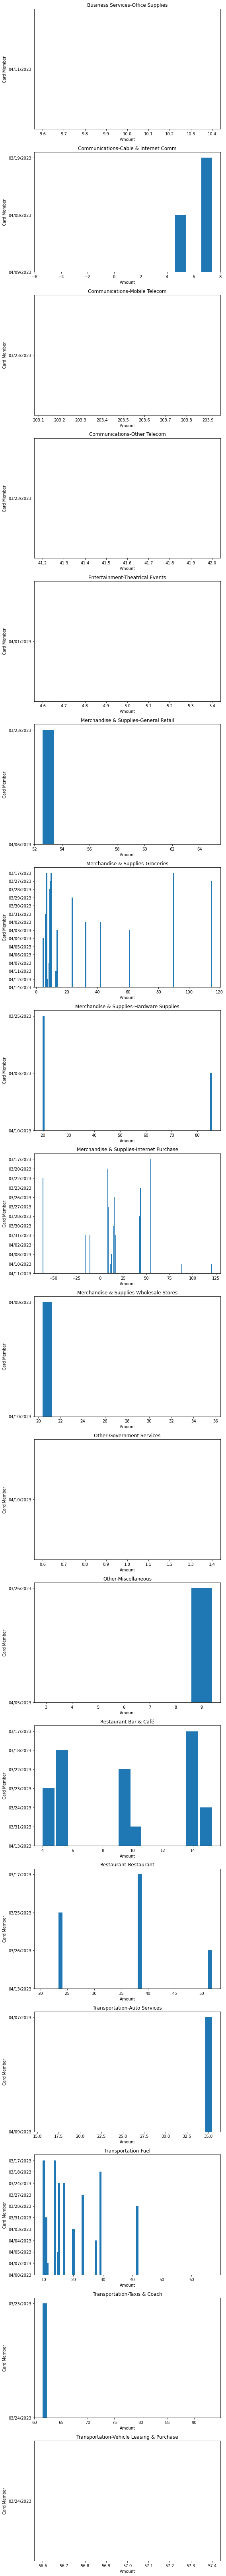

In [71]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(len(grouped_df), 1, figsize=(8, 5 * len(grouped_df)))

# Iterate over the groups and create a plot for each category
for i, (group_name, group_df) in enumerate(grouped_df):
    ax = axes[i] if len(grouped_df) > 1 else axes  # Handle multiple or single subplots
    
    # Plot a bar chart for the 'Age' column of the current group
    ax.bar(group_df['Amount'], group_df['Date'])
    
    # Set the subplot title and labels
    ax.set_title(f'{group_name}')
    ax.set_xlabel('Amount')
    ax.set_ylabel('Card Member')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()